In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread("src/img/lena.png")

def cv_show(img, name='img'):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [8]:
img=cv2.imread('src/img/lena.png')
img

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [3]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
img.shape

(512, 512, 3)

In [14]:
img=cv2.imread("src/img/lena.png", cv2.IMREAD_GRAYSCALE)
img

array([[169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)

In [15]:
img.shape

(512, 512)

In [4]:
vc = cv2.VideoCapture("src/video/dfl.mp4")
if vc.isOpened():
    open, frame = vc.read()
else :
    open = False

In [5]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)
        if cv2.waitKey(10) & 0xFF==27:
            break
vc.release()
cv2.destroyAllWindows()

#### 截取部分图像数据

In [4]:
img = cv2.imread("src/img/lena.png")
cat = img[0:200,0:200]
cv_show('img', cat)

#### 颜色通道提取

In [16]:
b,g,r = cv2.split(img)
r

array([[226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       [226, 226, 223, ..., 230, 221, 200],
       ...,
       [ 84,  84,  92, ..., 173, 172, 177],
       [ 82,  82,  96, ..., 179, 181, 185],
       [ 82,  82,  96, ..., 179, 181, 185]], dtype=uint8)

In [17]:
img = cv2.merge((b,g,r))
img.shape

(512, 512, 3)

In [18]:
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)

#### 边界填充

In [2]:
top, bottom, left, right = (50,50,50,50)
replicate = cv2.copyMakeBorder(img, top, bottom, left, right, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img, top, bottom, left, right, borderType=cv2.BORDER_REFLECT)
reflect_101 = cv2.copyMakeBorder(img, top, bottom, left, right, borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img, top, bottom, left, right, borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img, top, bottom, left, right, borderType=cv2.BORDER_CONSTANT,value=0)

In [4]:
cv_show('img',img)

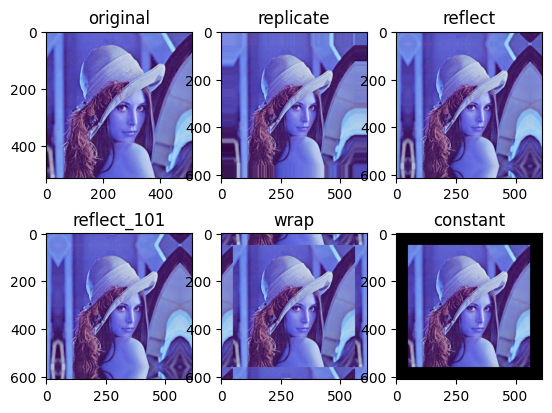

In [7]:
plt.subplot(231), plt.imshow(img), plt.title('original')
plt.subplot(232), plt.imshow(replicate), plt.title('replicate')
plt.subplot(233), plt.imshow(reflect), plt.title('reflect')
plt.subplot(234), plt.imshow(reflect_101), plt.title('reflect_101')
plt.subplot(235), plt.imshow(wrap), plt.title('wrap')
plt.subplot(236), plt.imshow(constant), plt.title('constant')
plt.show()

#### 数值计算

In [8]:
img_cat = cv2.imread("src/img/lena.png")
img_cat = img_cat + 10

In [13]:
img_cat[:5,:5,0]

array([[135, 135, 143, 138, 130],
       [135, 135, 143, 138, 130],
       [135, 135, 143, 138, 130],
       [135, 135, 143, 138, 130],
       [135, 135, 143, 138, 130]], dtype=uint8)

In [14]:
img_cat = img_cat + 200  # %256 取余
img_cat[:5,:5,0]

array([[79, 79, 87, 82, 74],
       [79, 79, 87, 82, 74],
       [79, 79, 87, 82, 74],
       [79, 79, 87, 82, 74],
       [79, 79, 87, 82, 74]], dtype=uint8)

In [15]:
cv2.add(img_cat, img_cat) # 不取余，取255

array([[[158, 182, 255],
        [158, 182, 255],
        [174, 182, 255],
        ...,
        [152, 204, 255],
        [128, 168, 255],
        [ 88, 106, 255]],

       [[158, 182, 255],
        [158, 182, 255],
        [174, 182, 255],
        ...,
        [152, 204, 255],
        [128, 168, 255],
        [ 88, 106, 255]],

       [[158, 182, 255],
        [158, 182, 255],
        [174, 182, 255],
        ...,
        [152, 204, 255],
        [128, 168, 255],
        [ 88, 106, 255]],

       ...,

       [[ 28, 255,  76],
        [ 28, 255,  76],
        [ 24, 255,  92],
        ...,
        [ 76,  54, 254],
        [ 60,  44, 252],
        [ 66,  32, 255]],

       [[ 22, 255,  72],
        [ 22, 255,  72],
        [ 32, 255, 100],
        ...,
        [ 66,  48, 255],
        [ 70,  50, 255],
        [ 70,  56, 255]],

       [[ 22, 255,  72],
        [ 22, 255,  72],
        [ 32, 255, 100],
        ...,
        [ 66,  48, 255],
        [ 70,  50, 255],
        [ 70,  56, 255]]

(<AxesSubplot:title={'center':'dog'}>,
 Text(0.5, 1.0, 'dog'))

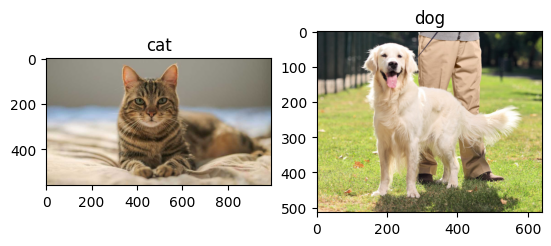

In [32]:
img_cat = cv2.imread('src/img/cat.jpg', cv2.IMREAD_COLOR)
img_dog = cv2.imread('src/img/dog.jpg')
plt.subplot(121), plt.imshow(img_cat[..., ::-1]), plt.title('cat')
plt.subplot(122), plt.imshow(cv2.cvtColor(img_dog, cv2.COLOR_BGR2RGB)), plt.title('dog')

In [23]:
cv_show(img_dog)

In [3]:
img_cat.shape

(558, 992, 3)

In [4]:
img_dog.shape

(514, 641, 3)

In [13]:
img_cat = cv2.resize(img_cat, (641, 514))

In [9]:
img_cat.shape

(514, 641, 3)

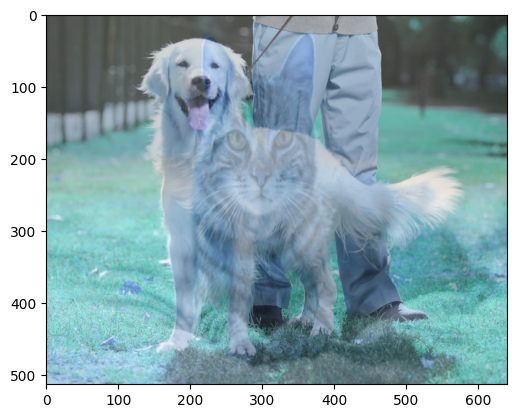

In [14]:
res = cv2.addWeighted(img_cat, 0.4, img_dog, 0.6, 0)
plt.imshow(res)

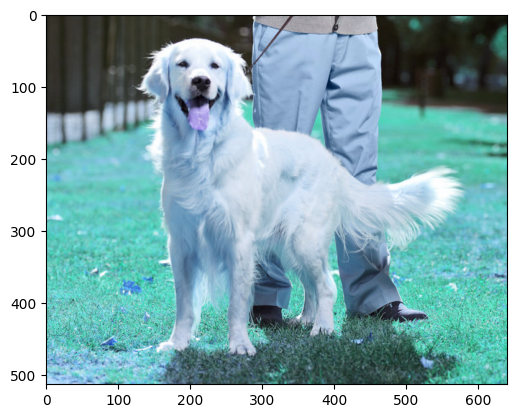

In [16]:
plt.imshow(img_dog)